In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split

In [2]:
data = load_svmlight_file("australian.txt")
X_train, X_test, y_train, y_test = train_test_split(data[0].todense(), data[1], test_size=0.25, random_state=42)

In [3]:
b1 = np.ones(X_train.shape[0])
X_train = np.c_[X_train,b1]
b2 = np.ones(X_test.shape[0])
X_test = np.c_[X_test,b2]

In [4]:
rate = 0.0005
C = 1
iter = 200
dimension = X_train.shape[1]

In [5]:
#w = np.zeros(dimension)                   #全零初始化
w = np.random.normal(size = (dimension))   #正态分布初始化
G = np.zeros(dimension)

In [6]:
def SVM (X_train, y_train, X_test, y_test, w):
    train_loss = np.zeros(iter)
    validation_loss = np.zeros(iter)
    #validation_loss = np.zeros(iter)
    for i in range(iter):
        hinge_loss_train = hinge_loss_f(X_train, y_train, w)
        train_loss[i] = np.dot(w, w.reshape(dimension, 1)) / 2 + C * hinge_loss_train
        hinge_loss_validation = hinge_loss_f(X_test, y_test, w)
        validation_loss[i] = np.dot(w, w.reshape(dimension, 1)) / 2 + C * hinge_loss_validation
        #gradient descent
        G = derivative(X_train, y_train, w)
        w = w - rate * G
    return train_loss,validation_loss

In [7]:
def hinge_loss_f (X, y, w):
    loss = 0
    for i in range(X.shape[0]):
        judge = y[i] * np.dot(X[i], w.reshape(dimension, 1))
        if (judge >= 1):
            loss = loss + 0
        else:
            loss = loss + 1 - judge
    loss = loss / X.shape[0]
    return loss

In [8]:
def derivative (X, y, w):
    g = np.zeros(X.shape[1])
    for i in range(X.shape[0]):
        judge = y[i] * np.dot(X[i], w.reshape(dimension, 1))
        if (judge < 1):
            g = g - y[i] * X[i]
    G = w + C * g
    return G

In [9]:
L_train, L_validation = SVM(X_train, y_train, X_test, y_test, w)

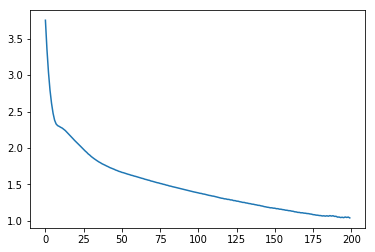

In [10]:
x = np.arange(iter)
plt.plot(x, L_train.tolist())
plt.show()

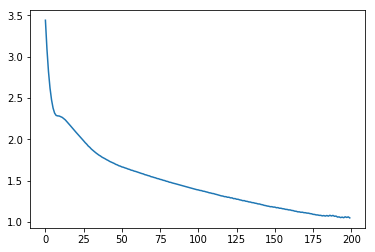

In [11]:
plt.plot(x, L_validation.tolist())
plt.show()